## Importing Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

cab_df=pd.read_csv("/Datasets/Cab_Data.csv")
city_df=pd.read_csv("/Datasets/City.csv")
customerID_df=pd.read_csv("/Datasets/Customer_ID.csv")
transactionID_df=pd.read_csv("/Datasets/Transaction_ID.csv")

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_df.Company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [5]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
customerID_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
transactionID_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [9]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [10]:
customerID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
transactionID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Date Parsing 

In [12]:
# src https://www.geeksforgeeks.org/python-convert-excel-serial-date-to-datetime/
# Importing xlrd module
import xlrd
  
# Initializing an excel serial date
# Calling the xldate_as_datetime() function to
# convert the specified excel serial date into
# datetime.datetime object
cab_df["Date of Travel"] = cab_df["Date of Travel"].apply(lambda x: xlrd.xldate_as_datetime(x, 0))
cab_df["Date of Travel"]


0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [13]:
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [14]:
# sort dataframe by date
cab_df.sort_values(by=["Date of Travel"],inplace=True,ascending=True)

In [15]:
cab_df["Date of Travel"]

1030     2016-01-02
489      2016-01-02
484      2016-01-02
850      2016-01-02
160      2016-01-02
            ...    
355489   2018-12-31
354114   2018-12-31
356365   2018-12-31
359162   2018-12-31
358336   2018-12-31
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [16]:
# Add datetime parameters for Date of Travel column
cab_df["Year"] = cab_df["Date of Travel"].dt.year
cab_df["Month"] = cab_df["Date of Travel"].dt.month
cab_df["Day"] = cab_df["Date of Travel"].dt.day
cab_df["DayOfWeek"] = cab_df["Date of Travel"].dt.dayofweek


In [17]:
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,DayOfWeek
1030,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,2,5
489,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016,1,2,5
484,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016,1,2,5
850,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016,1,2,5
160,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...
355489,10435011,2018-12-31,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,2018,12,31,0
354114,10433309,2018-12-31,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,2018,12,31,0
356365,10435915,2018-12-31,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,2018,12,31,0
359162,10439845,2018-12-31,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,2018,12,31,0


In [18]:
# Drop the Date of Travel column
cab_df.drop("Date of Travel",axis=1,inplace=True)
cab_df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month,Day,DayOfWeek
1030,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,2,5
489,10000640,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016,1,2,5
484,10000635,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016,1,2,5
850,10001001,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016,1,2,5
160,10000171,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016,1,2,5
...,...,...,...,...,...,...,...,...,...,...
355489,10435011,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,2018,12,31,0
354114,10433309,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,2018,12,31,0
356365,10435915,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,2018,12,31,0
359162,10439845,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,2018,12,31,0


In [19]:
# Replace spaces with _ in column names
cab_df.columns = cab_df.columns.str.replace(' ', '_')
transactionID_df.columns = transactionID_df.columns.str.replace(' ', '_')
customerID_df.columns = customerID_df.columns.str.replace(' ', '_')

## Number of Transactions Per Year

In [20]:
gb_year_company =cab_df.groupby(["Year","Company"])["Transaction_ID"].count()
gb_year_company

Year  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Transaction_ID, dtype: int64

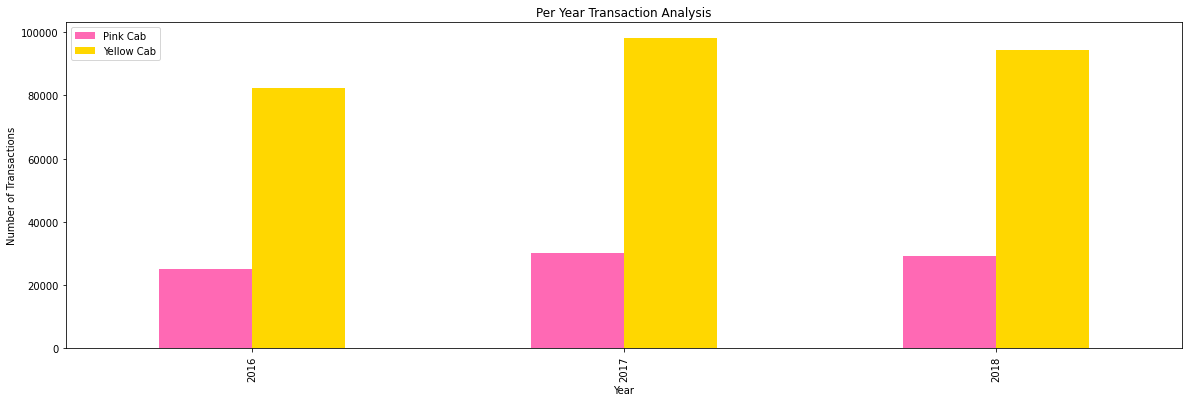

In [21]:
# cab_df.groupby(["travelYear"])["Transaction ID"].count()

gb_year_company.unstack().plot(kind="bar",
                         figsize=(20,6),
                         label='no_label',
                         color=["hotpink","gold"]);

# # Add some helpful info 
plt.title("Per Year Transaction Analysis")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.legend();
# plt.show();

In [22]:
cab_df.groupby(["Year","Company"])["Price_Charged"].mean()

Year  Company   
2016  Pink Cab      315.330113
      Yellow Cab    467.918301
2017  Pink Cab      315.907442
      Yellow Cab    466.639950
2018  Pink Cab      301.642530
      Yellow Cab    440.875558
Name: Price_Charged, dtype: float64

In [23]:
cab_df.groupby(["Year","Company"])["Cost_of_Trip"].mean()

Year  Company   
2016  Pink Cab      247.008294
      Yellow Cab    298.570481
2017  Pink Cab      248.836603
      Yellow Cab    297.822893
2018  Pink Cab      248.412841
      Yellow Cab    297.459436
Name: Cost_of_Trip, dtype: float64

## Number of Transactions Per Month

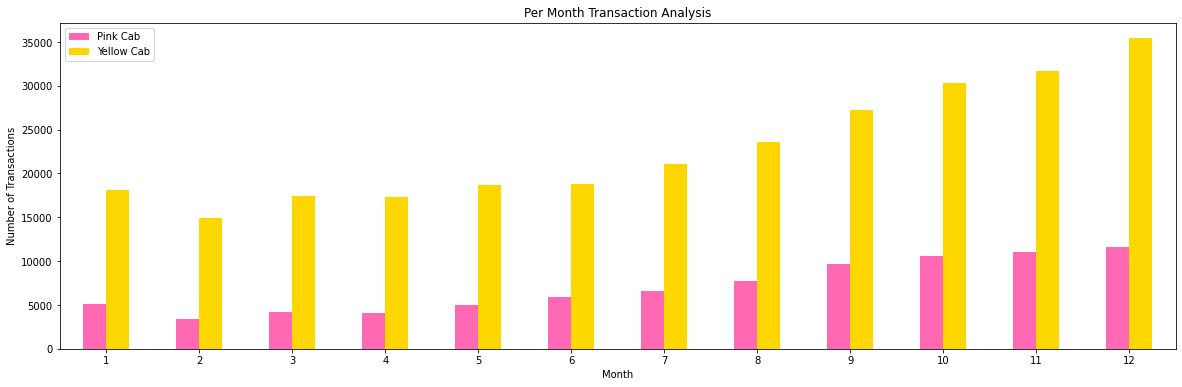

In [24]:
gb_month_company = cab_df.groupby(["Month","Company"])["Transaction_ID"].count()

gb_month_company =gb_month_company.unstack().plot(kind="bar",
                         figsize=(20,6),
                         label='no_label',
                         color=["hotpink","gold"]);

# # Add some helpful info 
plt.title("Per Month Transaction Analysis")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.legend();

In [25]:
cab_df.groupby('Month').KM_Travelled.mean()

Month
1     22.688692
2     22.526383
3     22.666627
4     22.567053
5     22.490692
6     22.593332
7     22.645335
8     22.545362
9     22.486335
10    22.514199
11    22.569173
12    22.578960
Name: KM_Travelled, dtype: float64

In [26]:
cab_df.groupby(["Month"])["Transaction_ID"].count()


Month
1     23174
2     18307
3     21646
4     21434
5     23701
6     24713
7     27676
8     31323
9     36859
10    40852
11    42700
12    47007
Name: Transaction_ID, dtype: int64

## Number of Transactions Per Day

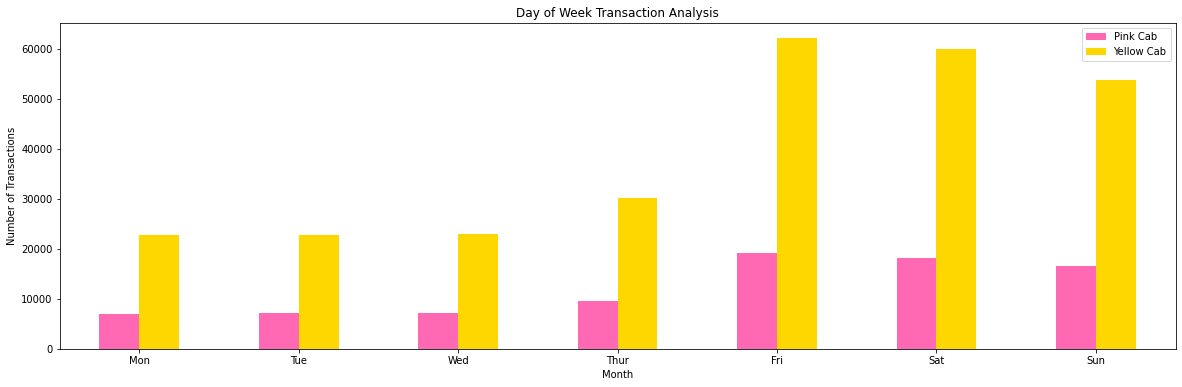

In [27]:
gb_dow =  cab_df.groupby(["DayOfWeek","Company"])["Transaction_ID"].count()

gb_dow.unstack().plot(kind="bar",
                         figsize=(20,6),
                         color=["hotpink","gold"]);

# # Add some helpful info 
plt.title("Day of Week Transaction Analysis")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(range(0,7),["Mon","Tue","Wed","Thur","Fri","Sat","Sun"],rotation=0)

plt.legend();

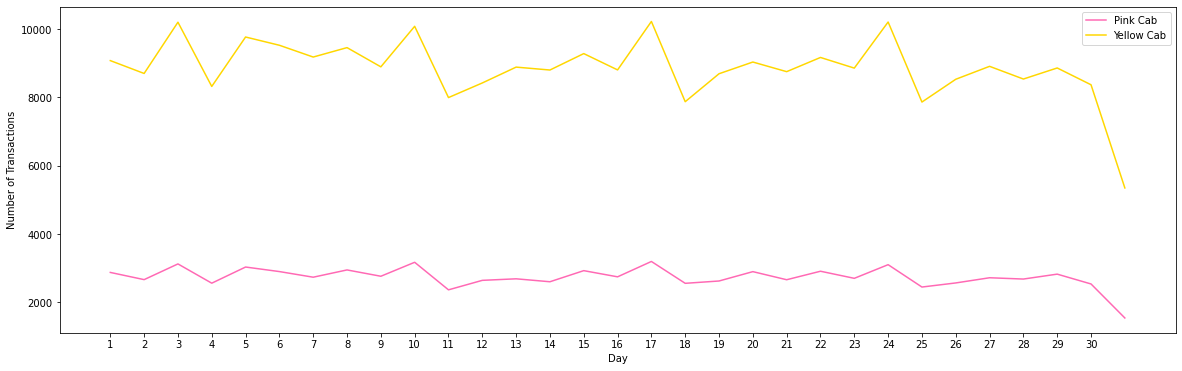

In [28]:
gb_day_company = cab_df.groupby(["Day","Company"]).Transaction_ID.count()
gb_day_company.unstack().plot(kind="line",
                              figsize=(20,6),
                              color=["hotpink","gold"])
plt.xticks(range(1,31))
plt.ylabel("Number of Transactions")
plt.legend();



## Transaction Per City 

In [29]:
gb_city_company = cab_df.groupby(['City','Company']).Transaction_ID.count()
gb_city_company

City            Company   
ATLANTA GA      Pink Cab       1762
                Yellow Cab     5795
AUSTIN TX       Pink Cab       1868
                Yellow Cab     3028
BOSTON MA       Pink Cab       5186
                Yellow Cab    24506
CHICAGO IL      Pink Cab       9361
                Yellow Cab    47264
DALLAS TX       Pink Cab       1380
                Yellow Cab     5637
DENVER CO       Pink Cab       1394
                Yellow Cab     2431
LOS ANGELES CA  Pink Cab      19865
                Yellow Cab    28168
MIAMI FL        Pink Cab       2002
                Yellow Cab     4452
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Pink Cab      13967
                Yellow Cab    85918
ORANGE COUNTY   Pink Cab       1513
                Yellow Cab     2469
PHOENIX AZ      Pink Cab        864
                Yellow Cab     1200
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

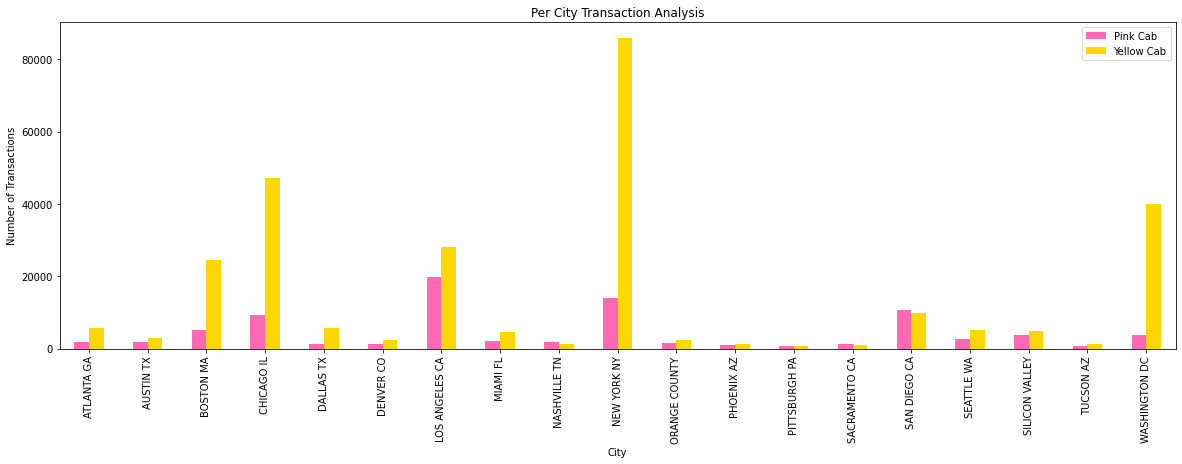

In [30]:
gb_city_company.unstack().plot(kind="bar",
                         figsize=(20,6),
                         label='no_label',
                         
                         color=["hotpink","gold"])
plt.title("Per City Transaction Analysis")
plt.ylabel("Number of Transactions")
plt.legend();

## Creating Main Data Frame

In [31]:
main_df = pd.merge(cab_df,transactionID_df)
main_df= pd.merge(main_df,customerID_df)
main_df

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,DayOfWeek,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,2,5,52536,Card,Male,24,10606
1,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,2016,3,26,5,52536,Cash,Male,24,10606
2,10102932,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,2016,11,9,2,52536,Cash,Male,24,10606
3,10164725,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,2017,4,17,0,52536,Card,Male,24,10606
4,10188478,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,2017,6,24,5,52536,Cash,Male,24,10606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439410,Yellow Cab,PITTSBURGH PA,4.04,81.05,52.8432,2018,12,31,0,50921,Card,Male,33,18698
359388,10439393,Yellow Cab,ORANGE COUNTY,24.78,379.42,347.9112,2018,12,31,0,15270,Cash,Female,18,19636
359389,10435871,Yellow Cab,ORANGE COUNTY,15.34,247.86,185.9208,2018,12,31,0,16342,Card,Female,23,2677
359390,10434039,Pink Cab,TUCSON AZ,26.26,427.50,296.7380,2018,12,31,0,40244,Cash,Male,46,34326


In [32]:
# Adding the margin or profit
main_df["Margin"] = main_df.Price_Charged - main_df.Cost_of_Trip
main_df 

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,DayOfWeek,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Margin
0,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,2,5,52536,Card,Male,24,10606,66.6760
1,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,2016,3,26,5,52536,Cash,Male,24,10606,14.3688
2,10102932,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,2016,11,9,2,52536,Cash,Male,24,10606,25.7090
3,10164725,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,2017,4,17,0,52536,Card,Male,24,10606,18.4932
4,10188478,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,2017,6,24,5,52536,Cash,Male,24,10606,114.8280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439410,Yellow Cab,PITTSBURGH PA,4.04,81.05,52.8432,2018,12,31,0,50921,Card,Male,33,18698,28.2068
359388,10439393,Yellow Cab,ORANGE COUNTY,24.78,379.42,347.9112,2018,12,31,0,15270,Cash,Female,18,19636,31.5088
359389,10435871,Yellow Cab,ORANGE COUNTY,15.34,247.86,185.9208,2018,12,31,0,16342,Card,Female,23,2677,61.9392
359390,10434039,Pink Cab,TUCSON AZ,26.26,427.50,296.7380,2018,12,31,0,40244,Cash,Male,46,34326,130.7620


## Price Charged Per Gender 

In [33]:
main_df.groupby(['Company','Gender']).Price_Charged.agg(['mean'])

mean
Company    Gender            
Pink Cab   Female  310.624823
           Male    310.940547
Yellow Cab Female  454.571538
           Male    460.821326

## Price Charged Per Payment Mode

In [34]:
main_df.groupby(['Company','Payment_Mode']).Price_Charged.agg(['mean'])

mean
Company    Payment_Mode            
Pink Cab   Card          311.197319
           Cash          310.209299
Yellow Cab Card          457.924979
           Cash          458.567368

In [35]:
gb_payment_mode = main_df.groupby("Payment_Mode").Price_Charged.count()
fig = px.pie(gb_payment_mode,
                        values=gb_payment_mode.values,
                        names=gb_payment_mode.index ,title="Total Customers Overview by Payment Method"
                        )
fig.update_traces(
                    textposition='inside',
                    textinfo='percent+label'
                        )
fig.update_layout( width = 600 , height = 600 )

## Relation Between KM Travelled and Other Features

In [36]:
gb_kmtravelled_company = main_df.groupby(['KM_Travelled','Company']).Customer_ID.count()
gb_kmtravelled_company

KM_Travelled  Company   
1.90          Pink Cab       76
              Yellow Cab    263
1.92          Pink Cab       80
              Yellow Cab    295
1.94          Pink Cab       75
                           ... 
47.20         Yellow Cab    298
47.60         Pink Cab       76
              Yellow Cab    305
48.00         Pink Cab       85
              Yellow Cab    281
Name: Customer_ID, Length: 1748, dtype: int64

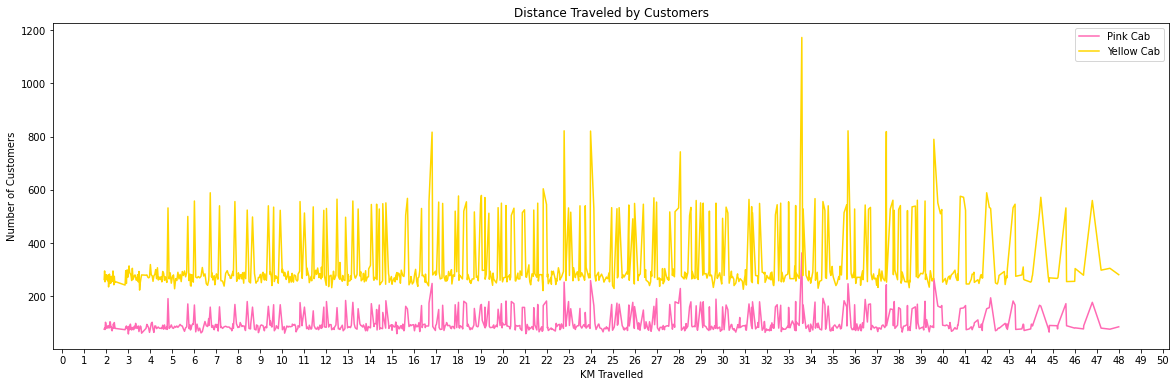

In [37]:
gb_kmtravelled_company.unstack().plot(kind="line",
                         figsize=(20,6),
                         label='no_label',
                          color=["hotpink","gold"])
plt.xticks(range(0,51))
plt.ylabel("Number of Customers")
plt.xlabel("KM Travelled")

plt.title("Distance Traveled by Customers")

plt.legend();


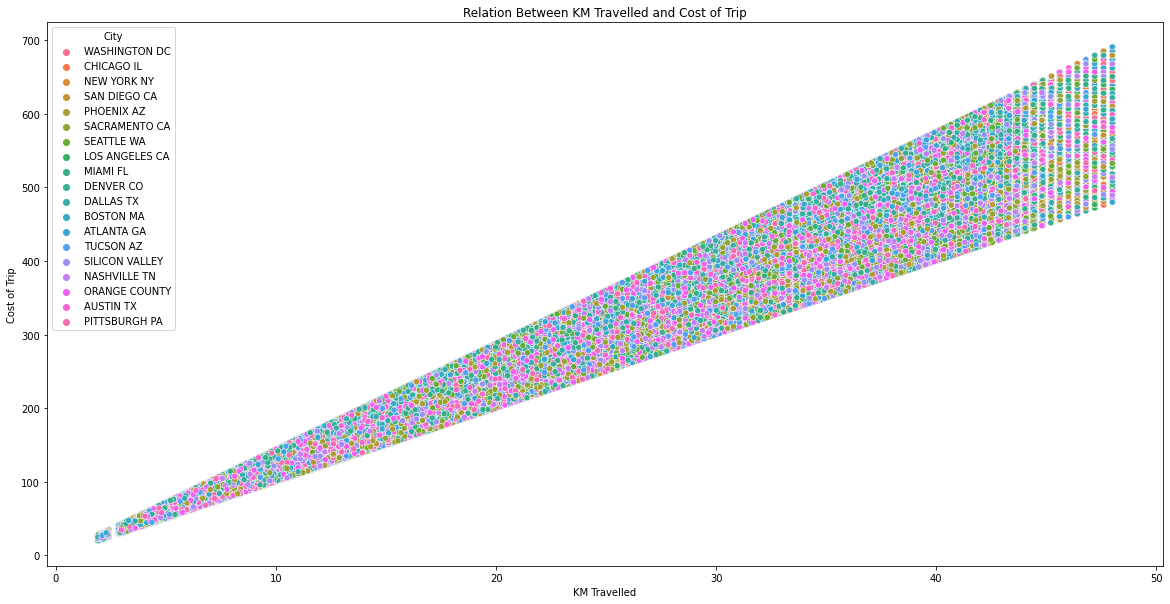

In [38]:
# Plot the data
plt.figure(figsize=(20,10))

sns.scatterplot(data=main_df, x="KM_Travelled", y="Cost_of_Trip", hue="City")
plt.title('Relation Between KM Travelled and Cost of Trip')
plt.xlabel("KM Travelled")
plt.ylabel("Cost of Trip");

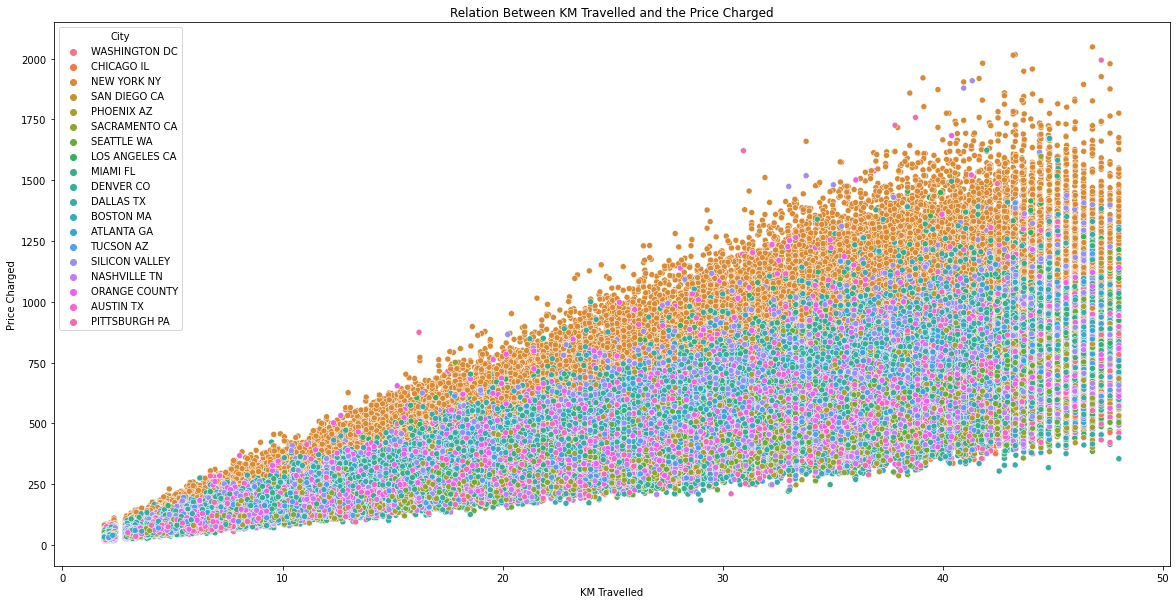

In [39]:
# Plot the data
plt.figure(figsize=(20,10))

sns.scatterplot(data=main_df, x="KM_Travelled", y="Price_Charged", hue="City")
plt.title('Relation Between KM Travelled and the Price Charged')
plt.xlabel("KM Travelled")
plt.ylabel("Price Charged");

## Age of Customers 

In [40]:
gb_age_company = main_df.groupby(['Age','Company']).Customer_ID.nunique()
gb_age_company

Age  Company   
18   Pink Cab      1028
     Yellow Cab    1256
19   Pink Cab      1062
     Yellow Cab    1280
20   Pink Cab      1072
                   ... 
63   Yellow Cab     411
64   Pink Cab       365
     Yellow Cab     425
65   Pink Cab       332
     Yellow Cab     391
Name: Customer_ID, Length: 96, dtype: int64

In [41]:
gb_age = main_df.groupby('Age').Customer_ID.nunique()
gb_age

Age
18    1450
19    1475
20    1535
21    1476
22    1499
23    1515
24    1442
25    1504
26    1485
27    1489
28    1500
29    1408
30    1457
31    1441
32    1492
33    1407
34    1548
35    1404
36    1433
37    1475
38    1417
39    1524
40    1456
41     491
42     493
43     498
44     458
45     524
46     508
47     503
48     502
49     502
50     509
51     496
52     497
53     479
54     479
55     468
56     490
57     462
58     502
59     517
60     473
61     550
62     462
63     481
64     505
65     467
Name: Customer_ID, dtype: int64

In [42]:
ageGroup_Young_Pink    = main_df[(main_df ["Age"] >= 18) & (main_df ["Age"] < 25) & (main_df["Company"] == "Pink Cab")] .count()
ageGroup_Middle_Pink   = main_df[(main_df ["Age"] >= 25) & (main_df ["Age"] < 40) & (main_df["Company"] == "Pink Cab")].count()
ageGroup_Old_Pink      = main_df[(main_df ["Age"] >= 40) & (main_df ["Age"] <= 65) & (main_df["Company"] == "Pink Cab")].count()

ageGroup_Young_Yellow  = main_df[(main_df ["Age"] >= 18) & (main_df ["Age"] < 25) & (main_df["Company"] == "Yellow Cab")] .count()
ageGroup_Middle_Yellow = main_df[(main_df ["Age"] >= 25) & (main_df ["Age"] < 40) & (main_df["Company"] == "Yellow Cab")].count()
ageGroup_Old_Yellow    = main_df[(main_df ["Age"] >= 40) & (main_df ["Age"] <= 65) & (main_df["Company"] == "Yellow Cab")].count()

dict0 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Pink ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Pink , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Pink }

dict1 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Yellow ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Yellow , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Yellow }

df_1 = pd.DataFrame(dict0).T
df_2 = pd.DataFrame(dict1).T

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=df_1.index,
                    y=df_1['Customer_ID'],
                    name='Pink Cab',
                    marker_color='hotpink' 
                    ))            
fig.add_trace(go.Bar(
                    x=df_2.index,
                    y=df_2['Customer_ID'],
                    name='Yellow Cab',
                    marker_color='gold'
                    ))
fig.update_layout(
    yaxis_title="Customers",
    title="Pink & Yellow Cab Firm Customers Distributions by Age Groups" )

Text(0, 0.5, 'Number of  Customers')

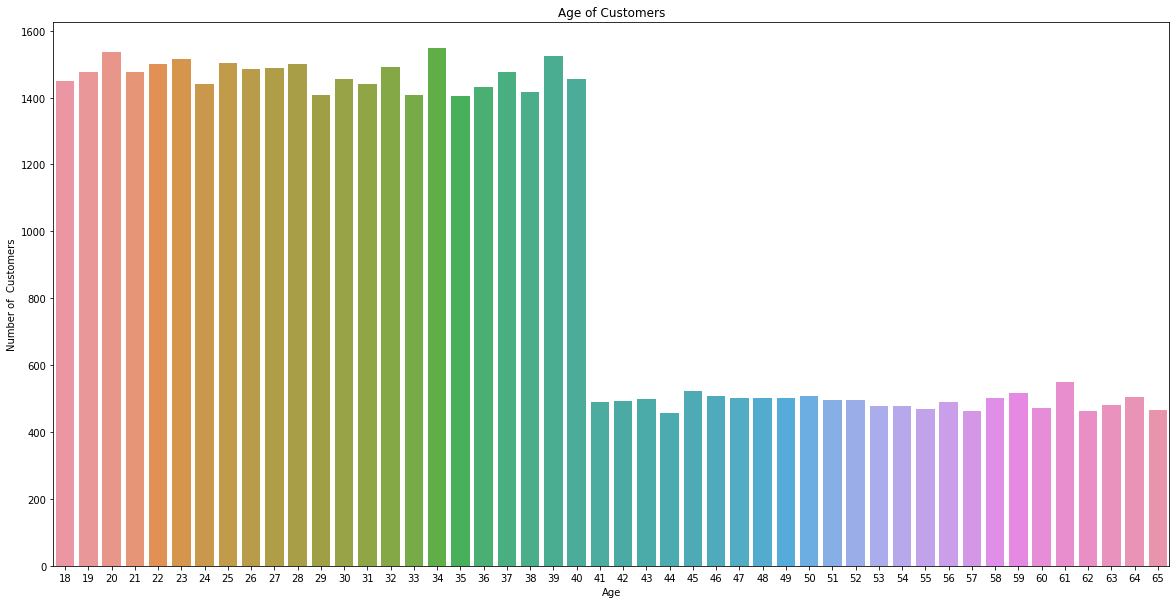

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x=gb_age.index,y=gb_age.values)
plt.title('Age of Customers')
plt.xlabel('Age')
plt.ylabel('Number of  Customers')

In [44]:
main_df.groupby('Company').Age.mean()

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

In [45]:

age_list = [gb_age[(gb_age.index>=18) & (gb_age.index<25)].values.sum(),gb_age[(gb_age.index>=25) & (gb_age.index<40)].values.sum(), gb_age[(gb_age.index>=40) & (gb_age.index<=65)].values.sum()]

age_dict = {"18 <= Age < 25" : [age_list[0]] ,"25 <= Age < 40" : [age_list[1]] , "40 <= Age <= 65" : [age_list[2]] }

age_df = pd.DataFrame(age_dict).T
fig1 = px.pie(age_df ,
                        values=age_df.values,
                        names=age_df.index ,title="Total Customers Overview by Age Groups"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 600 , height = 600 ) 

## Gender of Customers

In [46]:
main_df.groupby(['Company','Gender']).Customer_ID.nunique()

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

In [47]:
main_df.groupby("Gender").Customer_ID.count()

Gender
Female    153480
Male      205912
Name: Customer_ID, dtype: int64

In [48]:
gb_gender = main_df.groupby("Gender").Customer_ID.count()
fig1 = px.pie(gb_gender,
                        values=gb_gender.values,
                        names=gb_gender.index ,title="Total Customers Overview by Gender"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 600 , height = 600 )

In [49]:
yellow_cab_gender_list = [main_df[(main_df.Gender=='Male') & (main_df.Company=='Yellow Cab')]['Gender'].count(),main_df[(main_df.Gender=='Female') & (main_df.Company=='Yellow Cab')]['Gender'].count() ]

fig1 = px.pie(
              values=yellow_cab_gender_list,
              names=('Male','Female') ,title="Yellow Cab Customers Overview by Gender"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 600 , height = 600 )


In [50]:
pink_cab_gender_list = [main_df[(main_df.Gender == "Male") & (main_df.Company=="Pink Cab")]["Gender"].count() , 
       main_df[(main_df.Gender == "Female") & (main_df.Company=="Pink Cab")]["Gender"].count()]

fig1 = px.pie(
                values=pink_cab_gender_list,
                names=('Male','Female') ,title="Pink Cab Customers Overview by Gender"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 600 , height = 600 )

In [51]:
main_df.groupby(['Company','Year','Gender']).Transaction_ID.count()

Company     Year  Gender
Pink Cab    2016  Female    10873
                  Male      14207
            2017  Female    13475
                  Male      16846
            2018  Female    13132
                  Male      16178
Yellow Cab  2016  Female    33861
                  Male      48378
            2017  Female    41785
                  Male      56404
            2018  Female    40354
                  Male      53899
Name: Transaction_ID, dtype: int64

## Margin Analysis

In [52]:
main_df.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,DayOfWeek,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Margin
0,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,2,5,52536,Card,Male,24,10606,66.6760
1,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,2016,3,26,5,52536,Cash,Male,24,10606,14.3688
2,10102932,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,2016,11,9,2,52536,Cash,Male,24,10606,25.7090
3,10164725,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,2017,4,17,0,52536,Card,Male,24,10606,18.4932
4,10188478,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,2017,6,24,5,52536,Cash,Male,24,10606,114.8280


In [53]:
gb_year_company_margins=main_df.groupby(["Year","Company"]).Margin.mean()
gb_year_company_margins

Year  Company   
2016  Pink Cab       68.321819
      Yellow Cab    169.347821
2017  Pink Cab       67.070839
      Yellow Cab    168.817057
2018  Pink Cab       53.229689
      Yellow Cab    143.416122
Name: Margin, dtype: float64

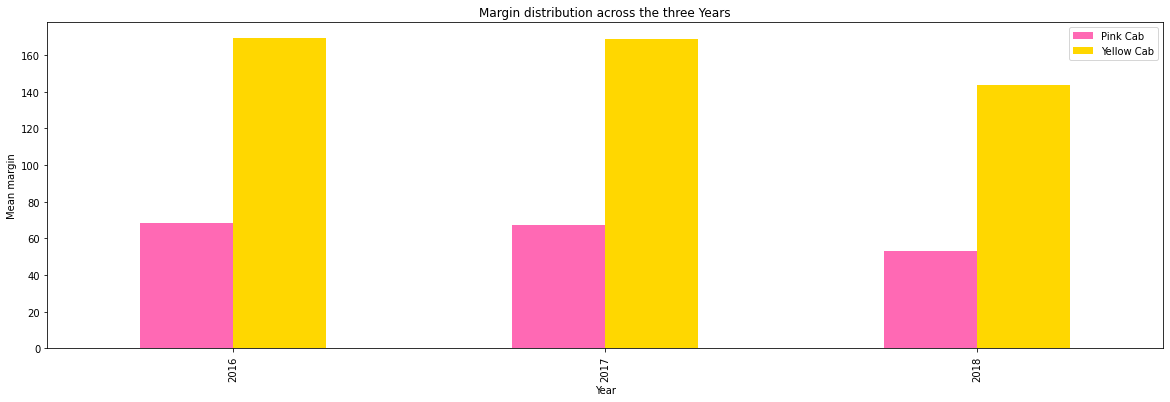

In [54]:
gb_year_company_margins.unstack().plot(kind="bar",
                                       figsize=(20,6),
                         
                                   color=["hotpink","gold"])
plt.ylabel("Mean margin")
plt.title("Margin distribution across the three Years")
plt.legend();

In [55]:
# correlation matrix
corr_matrix = main_df.corr()
corr_matrix


,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,DayOfWeek,Customer_ID,Age,Income_(USD/Month),Margin
Transaction_ID,1.000000,-0.001429,-0.052902,-0.003462,0.941600,0.287009,0.012021,-0.070220,-0.016912,-0.001267,-0.001570,-0.087130
KM_Travelled,-0.001429,1.000000,0.835753,0.981848,-0.001072,-0.001903,0.001652,0.001496,0.000389,-0.000369,-0.000544,0.462768
Price_Charged,-0.052902,0.835753,1.000000,0.859812,-0.036409,-0.061116,-0.004021,0.052298,-0.177324,-0.003084,0.003228,0.864154
Cost_of_Trip,-0.003462,0.981848,0.859812,1.000000,-0.001773,-0.008370,0.002091,0.001160,0.003077,-0.000189,-0.000633,0.486056
Year,0.941600,-0.001072,-0.036409,-0.001773,1.000000,-0.030490,-0.020995,-0.078597,-0.002539,-0.000579,-0.001617,-0.060567
Month,0.287009,-0.001903,-0.061116,-0.008370,-0.030490,1.000000,0.041412,0.014595,-0.044656,-0.002226,0.000322,-0.096352
Day,0.012021,0.001652,-0.004021,0.002091,-0.020995,0.041412,1.000000,-0.002823,0.000650,-0.001275,0.001860,-0.008942
DayOfWeek,-0.070220,0.001496,0.052298,0.001160,-0.078597,0.014595,-0.002823,1.000000,0.001322,-0.001791,-0.001294,0.088367
Customer_ID,-0.016912,0.000389,-0.177324,0.003077,-0.002539,-0.044656,0.000650,0.001322,1.000000,-0.004735,-0.013608,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.000579,-0.002226,-0.001275,-0.001791,-0.004735,1.000000,0.003907,-0.005093


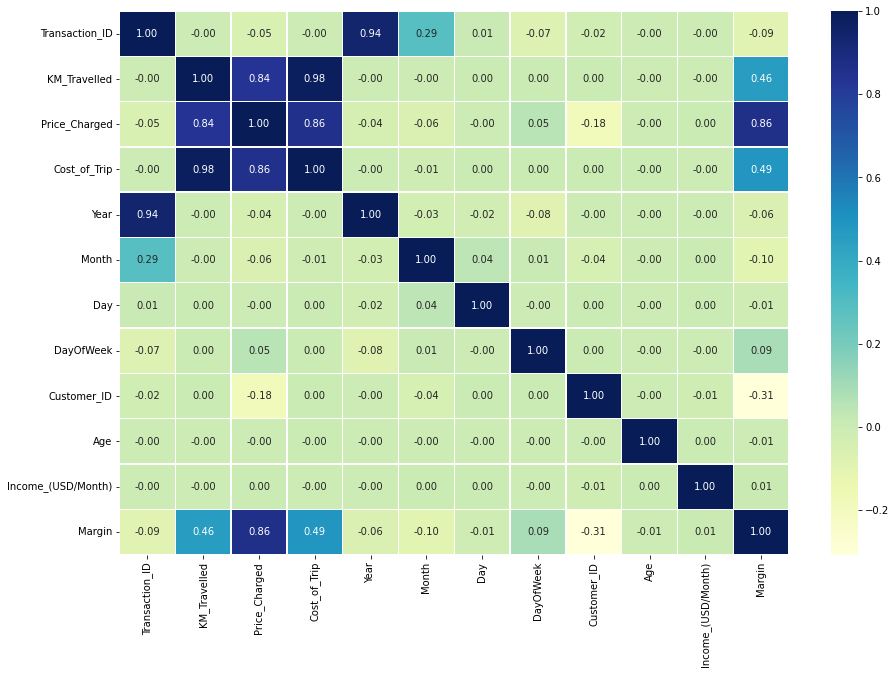

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

### Margin by City 

In [57]:
# Remove the , from the string
city_df.Population.replace(',','', regex=True, inplace=True)
city_df.Users.replace(',','', regex=True, inplace=True)
city_df.Population = city_df.Population.astype("int32")
city_df.Users = city_df.Users.astype("int32")

city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [58]:
main_df=pd.merge(main_df,city_df)
main_df.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,DayOfWeek,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Margin,Population,Users
0,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,2,5,52536,Card,Male,24,10606,66.6760,418859,127001
1,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,2016,3,26,5,52536,Cash,Male,24,10606,14.3688,418859,127001
2,10102932,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,2016,11,9,2,52536,Cash,Male,24,10606,25.7090,418859,127001
3,10164725,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,2017,4,17,0,52536,Card,Male,24,10606,18.4932,418859,127001
4,10188478,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,2017,6,24,5,52536,Cash,Male,24,10606,114.8280,418859,127001


In [62]:
main_df["User_Pop_Ratio"] = main_df["Users"] / main_df["Population"]
gb_city_sum = main_df.groupby("City").sum()
fig1 = px.pie(gb_city_sum,
                        values=gb_city_sum.Margin,
                        names=gb_city_sum.index ,title="Total Margin Share by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

## Most frequent Customers

In [79]:
main_df[main_df.Company=="Pink Cab"].groupby(["Customer_ID"]).Transaction_ID.count().sort_values(ascending=False).head(10)

Customer_ID
8120    18
6159    17
7927    17
8595    17
8915    16
8474    16
7340    16
8119    15
8721    15
7988    15
Name: Transaction_ID, dtype: int64

In [81]:
main_df[main_df.Company=="Yellow Cab"].groupby(["Customer_ID"]).Transaction_ID.count().sort_values(ascending=False).head(10)

Customer_ID
1360    47
1803    47
494     47
636     46
126     45
903     45
2766    45
1070    44
992     44
2539    44
Name: Transaction_ID, dtype: int64

In [82]:
main_df[main_df.Customer_ID == 8120].groupby("Company").Transaction_ID.count()

Company
Pink Cab      18
Yellow Cab     9
Name: Transaction_ID, dtype: int64

In [84]:
main_df[main_df.Customer_ID == 1360].groupby("Company").Transaction_ID.count()

Company
Pink Cab       2
Yellow Cab    47
Name: Transaction_ID, dtype: int64

## Hypothesis

> Do cab companies change prices based on number of transactions?

In [56]:
main_df[(main_df.Company=='Pink Cab')].groupby(['Year','Month']).Margin.mean().unstack()
dt1 = main_df[(main_df.Company=='Pink Cab')].groupby(['Year','Month']).Margin.mean()

dt2 = main_df[(main_df.Company=='Yellow Cab')].groupby(['Year','Month']).Margin.mean()

In [57]:
pd.DataFrame({'Margin_Pink_Cab':dt1.values,'Transaction_Pink_Cab':main_df[main_df.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

,Margin_Pink_Cab,Transaction_Pink_Cab
0,79.776551,927
1,83.310042,1050
2,71.325088,1231
3,66.606333,1240
4,39.279488,1567
5,41.100146,1730
6,49.841288,2125
7,57.910812,2272
8,50.416756,2854
9,72.020053,3334


In [58]:
dd1 = pd.DataFrame({'Margin_Pink_Cab':dt1.values,'Transaction_Pink_Cab':main_df[main_df.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margin_Yellow_Cab':dt2.values,'Transactions_Yellow_Cab':main_df[main_df.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

In [59]:
dd2

,Margin_Yellow_Cab,Transactions_Yellow_Cab
0,224.874458,3719
1,215.911248,4674
2,177.762298,5146
3,176.517989,5360
4,214.977948,5967
5,220.732655,5667
6,150.389628,6814
7,122.885222,6918
8,162.714973,8130
9,141.616868,9697


In [60]:
dd1.corr()

,Margin_Pink_Cab,Transaction_Pink_Cab
Margin_Pink_Cab,1.00000,0.19496
Transaction_Pink_Cab,0.19496,1.00000


In [61]:
dd2.corr()

,Margin_Yellow_Cab,Transactions_Yellow_Cab
Margin_Yellow_Cab,1.000000,-0.625993
Transactions_Yellow_Cab,-0.625993,1.000000


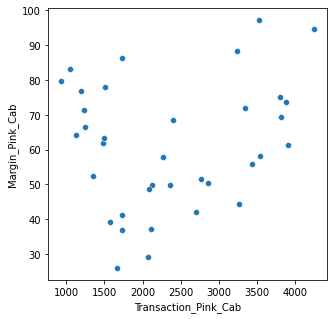

In [62]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transaction_Pink_Cab,y=dd1.Margin_Pink_Cab);

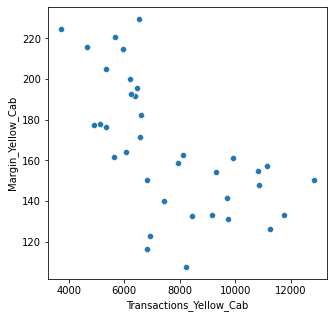

In [63]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_Yellow_Cab,y=dd2.Margin_Yellow_Cab);

> Result: Yellow Cab decreases their margins with number of Transactions increasing while the Pink Cab increases its charged price when the number of Transaction increases.

> Do Cab companies give discounts for Females?

In [64]:
a = main_df[(main_df.Gender=='Female')&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
b = main_df[(main_df.Gender=='Male')&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a=a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


In [65]:
a = main_df[(main_df.Gender=='Female')&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
b = main_df[(main_df.Gender=='Male')&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a=a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


> Maybe KM Travelled is making the margin difference

In [66]:
a = main_df[(main_df.Gender=='Female')&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
b = main_df[(main_df.Gender=='Male')&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a=a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

116000 158681
We accept null hypothesis that there is no difference
P value is  0.5146654429411317


In [67]:
a = main_df[(main_df.Gender=='Female')&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').KM_Travelled.mean()
b = main_df[(main_df.Gender=='Male')&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').KM_Travelled.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a= a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.6164626165258722


> Both genders have same average KM Travelled so the difference was not because of KM Travelled => Result: both Cab companies give discount to Female customers

> Do those companies give discount to old age customers?

In [68]:
main_df[main_df.Age<=45].groupby('Company').Margin.mean()

Company
Pink Cab       62.768219
Yellow Cab    160.635133
Name: Margin, dtype: float64

In [69]:
main_df[main_df.Age>45].groupby('Company').Margin.mean()

Company
Pink Cab       62.224599
Yellow Cab    158.875260
Name: Margin, dtype: float64

In [70]:
a = main_df[(main_df.Age<=45)&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
b = main_df[(main_df.Age>45)&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a=a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

66628 18083
We accept null hypothesis that there is no difference
P value is  0.40340123944148865


In [71]:
a = main_df[(main_df.Age<=45)&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
b = main_df[(main_df.Age>45)&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a=a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

216128 58553
We accept alternate hypothesis that there is a difference
P value is  0.027917813927287476


> Results: Only Yellow Cabs give discount to people older than 45

> Do any of the companies promote card or cash payments?

In [72]:
a = main_df[(main_df.Payment_Mode=='Cash')&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
b = main_df[(main_df.Payment_Mode=='Card')&(main_df.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no difference
P value is  0.7900465828793288


In [74]:
a = main_df[(main_df.Payment_Mode=='Cash')&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
b = main_df[(main_df.Payment_Mode=='Card')&(main_df.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.29330606382985325


> Results: There is no difference between card and cash payments